# Kryptografia z kluczem tajnym (symetryczna): szyfry strumieniowe
### Literatura:
1. Nowoczesna kryptografia, Aumasson
2. Kryptografia dla praktyków, Schneier

## 1. Problem: 

Napisz prosty program szyfrujący strumień tekstu jawnego przy pomocy operatora logicznego. Jaki operator logiczny będzie najwygodniejszy? W jaki sposób wytworzysz strumień klucza? 

In [1]:
# funkcje i algorytmy pomocnicze 
import random
random.seed("key")  #generator PRNG w python można inicjalizować tekstem

message = "kryptografia"

letters = list(message) #Jak zamienić tekst w tablicę 
print("Tekst jawny (znakowo)", letters)

mesg_array = list(message)
plaintext = []

#tablica znaków w tablicę kodów int
def intoIntArray(message: str):
    int_array = []
    mesg_array = list(message) 
    for i in mesg_array:
        int_array.append(ord(i))
    return int_array

#tablica kodów int w tablice znaków 
def intoCharArray(message: []):
    mesg_char = []
    for i in message:
        mesg_char.append(chr(i))
    return mesg_char

plaintext = intoIntArray(message)
print("Tekst jawny (liczbowo):", plaintext) 

#tablica znaków w napis 
plaintext_str = intoCharArray(plaintext)
print("Tekst jawny (napisowo):", ''.join(plaintext_str))



# jak wyświetlić dane w postaci binarnej 
get_bin = lambda x, n: format(x, 'b').zfill(n)
def printBinary(data: []):
    for i in data:
        print(get_bin(i,8), end=' ')

        

# jak wygenerować 8 losowych bitów (razy n)
def randomBytes(n):
    return bytes(random.getrandbits(8) for i in range(n))

random_stream = []
for i in range(8):
    random_stream.append(int.from_bytes(randomBytes(1), byteorder='big'))

print("Losowe bajty", random_stream)   
printBinary(random_stream)


Tekst jawny (znakowo) ['k', 'r', 'y', 'p', 't', 'o', 'g', 'r', 'a', 'f', 'i', 'a']
Tekst jawny (liczbowo): [107, 114, 121, 112, 116, 111, 103, 114, 97, 102, 105, 97]
Tekst jawny (napisowo): kryptografia
Losowe bajty [221, 143, 230, 71, 238, 233, 124, 214]
11011101 10001111 11100110 01000111 11101110 11101001 01111100 11010110 

In [2]:
key = 'Key'
message = 'This is a secret message'

ciphertext = []

def ciph(key, message):
    random.seed(key)
    random_stream = [int.from_bytes(randomBytes(1), byteorder='big') for i in range(len(message))]
    messint = intoIntArray(message)
    res = [random_stream[i]^messint[i] for i in range(len(messint))]
    return ''.join(intoCharArray(res))

print(message)
ciphertext = ciph(key, message)
print(ciphertext)
print(ciph(key, ciphertext))

This is a secret message
Ò`*wÓ?hi
This is a secret message


### Zastanów się: 
1. Poszukaj informacji o szyfrach binarnie addytywnych 
2. Poszukaj informacji o szyfrach strumieniowych używanych w praktyce. Gdzie takie szyfry mogą być obecnie stosowane? 

## Problem 2 
Utwórz dwie różne wiadomości równej długości. Zaszyfruj je szyfrem XOR z użyciem tego samego klucza. Wyznacz alternatywę rozłączną szyfrogramów (XOR) i porównaj ją z tą samą operacją wykonaną dla tekstów jawnych. Jakie znaczenie ma wynik z punktu widzenia kryptoanalizy. 

In [3]:
message1 = 'secret'
message2 = 'poufny'

ciph1 = ciph(key, message1)
ciph2 = ciph(key, message2)
print(message1, ":", ciph1)
print(message2, ":", ciph2)

def xorTexts(a, b):
    aInt = intoIntArray(a)
    bInt = intoIntArray(b)
    res = [aInt[i]^bInt[i] for i in range(len(a))]
    return ''.join(intoCharArray(res))

print("Jawne:", xorTexts(message1, message2))
print("Zaszyfrowane:", xorTexts(ciph1, ciph2))

secret : EEgs
poufny : FQl~
Jawne: 

Zaszyfrowane: 



### Bezpieczeństwo szyfru XOR
1. Jeśli OTP to OK.
2. Na czym polega atak ze znanym tekstem jawnym?

## Problem 3
1. Utwórz dowolną wiadomość $M_1$. 
2. Zaszyfruj ją swoim szyfrem XOR z kluczem $K$. 
3. Wykonaj na szyfrogramie $C_1$ operację $C_2 = C_1 \oplus (111\ldots1)$. 
4. Odszyfruj wiadomość $C_2$ stosując ten sam klucz $K$. 
5. Porównaj wiadomości: $M_1$ i odszyfrowaną w poprzednim kroku $M_2$ (najlepiej binarnie). 

In [4]:
M1 = message1
C1 = ciph(key, M1)

def appOnes(m):
    mInt = intoIntArray(m)
    oInt = [255 for i in range(len(m))]
    res = [mInt[i]^oInt[i] for i in range(len(m))]
    return ''.join(intoCharArray(res))

C2 = appOnes(C1)

M2 = ciph(key, C2)
print(M1)
print(M2)
printBinary(intoIntArray(M1))
print('\n')
printBinary(intoIntArray(M2))

secret

01110011 01100101 01100011 01110010 01100101 01110100 

10001100 10011010 10011100 10001101 10011010 10001011 

# Szyfr strumieniowy RC4

1. Odkryj sposób działania algorytmu RC4. Poszukaj informacji gdzie był używany RC4.

A) Inicjalizacja generatora liczb pseudolosowych:
    
    a) zainicjuj tablicę S liczbami od 0 do 255
    b) permutuj tablicę S 256 razy (i=0...255); od j=0:
        i = i + 1
        j = (j + S[i] + K[i mod KeyLength]) mod 256
        swap(S[i], S[j])
    

B) Generowanie strumienia klucza (od i,j=0):

    a) i = (i + 1) mod 256
    b) j = (j + S[i]) mod 256
    c) swap(S[i], S[j])
    d) keyStreamByte = S[(S[i]+S[j]) mod 256]
    c) cipherByte = plaintextByte^keyStreamByte

In [5]:
import codecs
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))

MOD = 256
#inicjalizacja generatora szyfru RC4

def KSA(key):
    key_length = len(key)
    # inicjalizuj tablice permutacji S
    
    S = [i for i in range(256)]
    j=0
    for i in range(256):
        j = (j+S[i]+key[i%key_length])%256
        S[i], S[j] = S[j], S[i]
        
    return S

<Figure size 1080x648 with 0 Axes>

In [6]:
#generator liczb pseudolosowych RC4
def PRGA(S):
    #... 
    i=0
    j=0
    while True:
      # napisz kod tutaj 
        i = (i+1)%256
        j = (j+S[i])%256
        S[i], S[j] = S[j], S[i]
        K = S[(S[i]+S[j])%256]
        yield K

In [7]:
def get_keystream(key):
    S = KSA(key)
    return PRGA(S)


def encrypt_logic(key, text, kstr):
    key = [ord(c) for c in key]
    keystream = get_keystream(key)
    res = []
    for c in text:
        ks = next(keystream)
        kstr.append(ks)
        val = ("%02X" % (c ^ ks))  # XOR and taking hex
        res.append(val)
    return ''.join(res)


def encrypt(key, plaintext):
    kstream =[]
    plaintext = [ord(c) for c in plaintext]
    text = encrypt_logic(key, plaintext,kstream)
    #print("\n Key stream :", kstream)
    # matplotlib histogram
    plt.hist(kstream, color = 'blue', edgecolor = 'black', bins = 256)
    plt.title('Histogram of RC4 key stream')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.figure(figsize=(15,19))
    plt.show()
    return text

def decrypt(key, ciphertext):
    kstream =[]
    ciphertext = codecs.decode(ciphertext, 'hex_codec')
    res = encrypt_logic(key, ciphertext,kstream)
    return codecs.decode(res, 'hex_codec').decode('utf-8')


def main():

    key = 'klucz-szyfrowy'  # plaintext
    plaintext = 'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Proin nibh augue, suscipit a, scelerisque sed, lacinia in, mi.'  # plaintext
    ciphertext = encrypt(key, plaintext)
    print('Tekst jawny:', plaintext)
    print('Szyfrogram:', ciphertext)
    decrypted = decrypt(key, ciphertext)
    print('Tekst odszyfrowany:', decrypted)


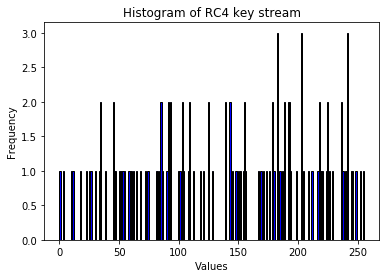

<Figure size 1080x1368 with 0 Axes>

Tekst jawny: Lorem ipsum dolor sit amet, consectetur adipiscing elit. Proin nibh augue, suscipit a, scelerisque sed, lacinia in, mi.
Szyfrogram: 5D35E951F8AB6369A98A3FD2F35341B4B96AC00E048B805F1891C10D91C63851D607296EFBA4A8160CC3E2C0D4909273D5329756ADAEB6B59438B9AFFDF6E1F4A43715DD4EA1972165F09D9E1833BEE9FF9B2F680DBD7152835FC2F9361F9D4AC293D9929067191EDB06BA477010D8EB7F4C77E0083408
Tekst odszyfrowany: Lorem ipsum dolor sit amet, consectetur adipiscing elit. Proin nibh augue, suscipit a, scelerisque sed, lacinia in, mi.


In [8]:
main()

## Atak na RC4 i WEP
Bias - odchylenie. Generator RC4 jest 'biased' to znaczy nie generuje rozkładu idealnie jednostajnego. 
Liczne ataki na RC4 i WEP (za Wikipedią i innymi źródłami)c:
- ,,In 1995, Andrew Roos experimentally observed that the first byte of the keystream is correlated to the first three bytes of the key and the first few bytes of the permutation after the KSA are correlated to some linear combination of the key bytes.''

- In August 2001, Scott Fluhrer, Itsik Mantin, and Adi Shamir published a cryptanalysis of WEP that exploits the way the RC4 ciphers and IV are used in WEP, resulting in a passive attack that can recover the RC4 key after eavesdropping on the network. Depending on the amount of network traffic, and thus the number of packets available for inspection, a successful key recovery could take as little as one minute. If an insufficient number of packets are being sent, there are ways for an attacker to send packets on the network and thereby stimulate reply packets which can then be inspected to find the key. The attack was soon implemented, and automated tools have since been released. It is possible to perform the attack with a personal computer, off-the-shelf hardware and freely available software such as aircrack-ng to crack any WEP key in minutes.

- In 2005, a group from the U.S. Federal Bureau of Investigation gave a demonstration where they cracked a WEP-protected network in 3 minutes using publicly available tools.[14] Andreas Klein presented another analysis of the RC4 stream cipher. Klein showed that there are more correlations between the RC4 keystream and the key than the ones found by Fluhrer, Mantin and Shamir which can additionally be used to break WEP in WEP-like usage modes.

- In 2007, Erik Tews, Andrei Pychkine, and Ralf-Philipp Weinmann were able to extend Klein's 2005 attack and optimize it for usage against WEP. With the new attack it is possible to recover a 104-bit WEP key with probability 50% using only 40,000 captured packets. For 60,000 available data packets, the success probability is about 80% and for 85,000 data packets about 95%. Using active techniques like deauth and ARP re-injection, 40,000 packets can be captured in less than one minute under good conditions. The actual computation takes about 3 seconds and 3 MB of main memory on a Pentium-M 1.7 GHz and can additionally be optimized for devices with slower CPUs. The same attack can be used for 40-bit keys with an even higher success probability.

- In 2015, security researchers from KU Leuven presented new attacks against RC4 in both TLS and WPA-TKIP.[54] Dubbed the Numerous Occurrence MOnitoring & Recovery Exploit (NOMORE) attack, it is the first attack of its kind that was demonstrated in practice. Their attack against TLS can decrypt a secure HTTP cookie within 75 hours. The attack against WPA-TKIP can be completed within an hour, and allows an attacker to decrypt and inject arbitrary packets.

## Jak sprawdzać losowość ciągu? Testy losowaości.  

1. Poszukaj informacji o kryptograficznych generatorach liczb pseudolosowych. Jaki jest najważniejsza własność generatora z punktu widzenia kryptografii? 
2. Przykładowy test losowości monobit (https://csrc.nist.gov/publications/detail/sp/800-22/rev-1a/final). Przeanalizuj kod. 

In [9]:
import numpy
import math
from scipy import special as spc

def monobit(bin_data: str):
    """
    Note that this description is taken from the NIST documentation [1]
    [1] http://csrc.nist.gov/publications/nistpubs/800-22-rev1a/SP800-22rev1a.pdf
  
    The focus of this test is the proportion of zeros and ones for the entire sequence. The purpose of this test is
    to determine whether the number of ones and zeros in a sequence are approximately the same as would be expected
    for a truly random sequence. This test assesses the closeness of the fraction of ones to 1/2, that is the number
    of ones and zeros ina  sequence should be about the same. All subsequent tests depend on this test.
  
    :param bin_data: a binary string
    :return: the p-value from the test
    """
    count = 0
    # If the char is 0 minus 1, else add 1
    for char in bin_data:
        if char == '0':
            count -= 1
        else:
            count += 1
    # Calculate the p value
    sobs = count / math.sqrt(len(bin_data))
    p_val = spc.erfc(math.fabs(sobs) / math.sqrt(2))
    return p_val


#Generowanie n-bitowego ciągu 
n=3
#arr = numpy.random.randint(2, size=(n,))
bitString = []
for i in range(0, 1024):
    x = str(numpy.random.randint(0, 2))
    bitString.append(x)
arr = ''.join(bitString)
print(arr)
print(monobit(arr))

1100100011100000000011010010110111000001011100100011010000011010110001011000110111011010111010101111010101100001001110100010010100101101100101011110111110100001100111000101100011010110111110110111010111000110001001000100100111010101001001101110011111010100001010110100010110010101011100110101001111001010011011111100011001111011011110011111111001001101111001101111101111011000101100001110100010110101010000100001011001001111000010110011110111000100100000000111000001001100000111010001111011101000110110011111000001110001011111100000011011011110001000010000111011110011111000110101011010010110010010011000111010011001011001111011100110110110010010100000000100111101100111010100011001001011111110001010010110100101111110001000000110000110111010110010111100000110101001111001001011001111010101001011110111101000101110010110000110101011100110001001110001100000111011010110111001100000011111111101011000110000110000101110100101011011000111001101010111010101101011000100101111001110000000111111011111001101

Poniższy test nazywa się runs i opiera się na zliczaniu serii nieprzerwanych ciągów 0 albo 1 w ciągu wejściowym. Ocenia czy ich ilość jest taka jak przewidywana dla danych losowych.

W samym teście najpierw wyliczamy wartość pi, czyli stosunek liczby jedynek do długości ciągu wejściowego. Następnie sprawdzamy czy ten stosunek mieści się w rozsądnym przedziale, co sprawdzamy za pomocą wyliczenia wartości tau, które wynosi 2/sqrt(n) gdzie n to długość ciągu wejściowego. Im dłuższy ciąg, tym bardziej pi powinno zbliżać się do 1/2. Jeżeli okaże się, że wartość ta za bardzo odstaje od przewidywanej, nie trzeba stosować testu runs aby stwierdzić, że dane wejściowe nie wyglądają losowo.

Następnie zliczamy faktyczną liczbę nieprzerwanych ciągów tych samych wartości. Wyliczamy p_value stosując korzystając z funkcji zaproponowanej przez autorów testu. Na końcu sprawdzamy, czy p_value jest większe niż 1%. Jeżeli jest, test zostaje zakończony pomyślnie.

In [10]:
import numpy
import math
from scipy import special as spc

def count_ones(bin_data: str):
    count=0
    for l in bin_data:
        if l=='1':
            count+=1
    return count

def runs(bin_data: str):
    """
    Note that this description is taken from the NIST documentation [1]
    [1] http://csrc.nist.gov/publications/nistpubs/800-22-rev1a/SP800-22rev1a.pdf
  
    The focus of this test is the total number of runs in the sequence,
    where a run is an uninterrupted sequence of identical bits.  
    A run of length k consists of exactly k identical bits and is bounded
    before and after with a bit of the opposite value. 
    The purpose of the runs test is to determine whether the number of runs of
    ones and zeros of various lengths is as expected for a random sequence. 
    In particular, this test determines whether the oscillation between such
    zeros and ones is too fast or too slow. 


    :param bin_data: a binary string
    :return: the p-value from the test
    """
    n = len(bin_data)
    pi = count_ones(bin_data)/n
    tau = 2/math.sqrt(n)
    
    if abs(pi - 1/2) >= tau:
        print("Test Monobit nie powinien zostać zaliczony.")
        return 0
    
    count = 1
    # If the char at next index is different, there is a new run
    for i in range(n-1):
        if bin_data[i] != bin_data[i+1]:
            count+=1
            
    # Calculate the p value
    p_val = spc.erfc((abs(count-2*n*pi*(1-pi)))/(2*math.sqrt(2*n)*pi*(1-pi)))
    return p_val


# Generowanie n-bitowego ciągu 
n=3
arr = numpy.random.randint(2, size=(n,))
bitString = []
for i in range(0, 1024):
    x = str(numpy.random.randint(0, 2))
    bitString.append(x)
arr = ''.join(bitString)
# arr = '1001101011' - taki przykład podano w opisie testu, wynik wynosi zgodnie z opisem 0.147232
print(arr)
res = runs(arr)
if res > 0.01:
    print("Test zakończony pomyślnie:")
else:
    print("Test niezaliczony:")
print(res)

0100010101010011111110000110100100000010000110011001110011110000111100000101110110110110010011010100010101100011101010011100001100001011110010011011111111110110010000001101111011001010011010000101000011001101110001100110011001100101100001001010100111110000001111101001100010110000010001010011111000101100011011100110111100101001100100110100110010100011000100100011101010010101011011111110111000111001000011001001101011010110000010011010110011001000101101011111001001111100101101110001011011001011010000111011001000010101111101110101111100100010001001010001001110001110010011111101011101110000000001110101010001011101000000001100100010001011001110111111010100010100111111011111001101001001111111010111100011010101000111110001000010110101011011010101000001011110001011110010110110000001001000011101101111011010010011101111100101000101001001110000011010000011100011011100011111000111110000001111010011011010111010100000100111010110000100000001111010000101101001000100101111101110111101011111001110011001